In [1]:
import glob
import os
import pickle

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set_theme(style='darkgrid')

In [4]:
NUM_CLASSES = 22

In [5]:
DATA_DIR = './data'
MODEL_DIR = './models'
RESULT_DIR = './results'

In [6]:
list_full_labeled_result_files = glob.glob(os.path.join(RESULT_DIR, 'test_seed_*_full.csv'))

In [7]:
list_partial_labeled_result_files = glob.glob(os.path.join(RESULT_DIR, 'test_seed_*_labeled_*.csv'))

## Main Results

In [8]:
df_full = []
for f in list_full_labeled_result_files:
    seed = int(os.path.basename(f).split('.')[0].split('_')[2])
    data = np.load(os.path.join(DATA_DIR, f'seed_{seed}_full.npz'))
    y_train = data['y_train']
    df_temp = pd.read_csv(f)
    df_temp['Seed'] = seed
    df_temp['LabelsTotal'] = len(y_train)
    df_temp['LabelsPerClass'] = len(y_train) // NUM_CLASSES
    df_full.append(df_temp)
df_full = pd.concat(df_full, axis=0)
df_full

,Model,Accuracy,Precision,Recall,F1,LogLoss,AUC,Seed,LabelsTotal,LabelsPerClass
0,Lasso,0.981818,0.983076,0.981818,0.981881,0.080649,0.999876,1,1584,72
1,Ridge,0.970455,0.973212,0.970455,0.970254,0.303007,0.999697,1,1584,72
2,SVM,0.990909,0.991114,0.990909,0.990903,0.161837,0.999940,1,1584,72
3,RF,0.995455,0.995671,0.995455,0.995452,0.052067,1.000000,1,1584,72
4,SSGMM_DIAG,0.995455,0.995671,0.995455,0.995452,0.013729,0.999989,1,1584,72
...,...,...,...,...,...,...,...,...,...,...
2,SVM,0.990909,0.991322,0.990909,0.990959,0.150742,0.999919,5,1584,72
3,RF,0.995455,0.995671,0.995455,0.995452,0.083236,0.999995,5,1584,72
4,SSGMM_DIAG,0.997727,0.997835,0.997727,0.997726,0.010123,0.999989,5,1584,72
5,SSGMM_FULL,0.993182,0.993506,0.993182,0.993178,0.015155,0.999989,5,1584,72


In [9]:
df_full.groupby('Model').agg(['mean', 'std']).drop(columns=['Seed', 'LabelsTotal', 'LabelsPerClass'])

Accuracy           Precision              Recall            \
                mean       std      mean       std      mean       std   
Model                                                                    
Lasso       0.981591  0.005298  0.982256  0.005066  0.981591  0.005298   
RF          0.994318  0.002455  0.994594  0.002459  0.994318  0.002455   
Ridge       0.976364  0.007123  0.977394  0.006676  0.976364  0.007123   
SSGMM_DIAG  0.995682  0.002924  0.995901  0.002830  0.995682  0.002924   
SSGMM_FULL  0.992955  0.001990  0.993224  0.002050  0.992955  0.001990   
SSGMM_TUNE  0.995682  0.002924  0.995901  0.002830  0.995682  0.002924   
SVM         0.989545  0.004695  0.989898  0.004418  0.989545  0.004695   

                  F1             LogLoss                 AUC            
                mean       std      mean       std      mean       std  
Model                                                                   
Lasso       0.981544  0.005296  0.058456  0.017817  0.999847  0.000045  
RF          0.994313  0.002455  0.060517  0.009948  0.999978  0.000022  
Ridge       0.976295  0.007167  0.162827  0.091988  0.999753  0.000086  
SSGMM_DIAG  0.995677  0.002927  0.014246  0.003030  0.999973  0.000021  
SSGMM_FULL  0.992942  0.001989  0.016171  0.003148  0.999959  0.000035  
SSGMM_TUNE  0.995677  0.002927  0.014246  0.003030  0.999973  0.000021  
SVM         0.989530  0.004694  0.162826  0.010532  0.999902  0.000061

In [10]:
df_partial = []
for f in list_partial_labeled_result_files:
    file_name_split = os.path.basename(f).split('.')[0].split('_')
    seed = int(file_name_split[2])
    labels_per_class = int(file_name_split[4])
    df_temp = pd.read_csv(f)
    df_temp['Seed'] = seed
    df_temp['LabelsPerClass'] = labels_per_class
    df_temp['LabelsTotal'] = labels_per_class * NUM_CLASSES
    df_partial.append(df_temp)
df_partial = pd.concat(df_partial, axis=0, ignore_index=True)
df_partial

,Model,Accuracy,Precision,Recall,F1,LogLoss,AUC,Seed,LabelsPerClass,LabelsTotal
0,Lasso,0.929545,0.936853,0.929545,0.928639,0.244928,0.998393,4,4,88
1,Ridge,0.922727,0.932237,0.922727,0.920215,0.471081,0.997917,4,4,88
2,SVM,0.900000,0.928820,0.900000,0.904144,1.467216,0.998425,4,4,88
3,RF,0.963636,0.967009,0.963636,0.963430,0.560425,0.999034,4,4,88
4,SSGMM_DIAG,0.995455,0.995671,0.995455,0.995452,0.017816,0.999957,4,4,88
...,...,...,...,...,...,...,...,...,...,...
1045,SVM,0.988636,0.989177,0.988636,0.988629,0.756908,0.999870,6,14,308
1046,RF,0.984091,0.984601,0.984091,0.984018,0.232470,0.999886,6,14,308
1047,SSGMM_DIAG,0.993182,0.993703,0.993182,0.993169,0.016994,0.999978,6,14,308
1048,SSGMM_FULL,0.990909,0.991322,0.990909,0.990898,0.020385,0.999968,6,14,308


In [11]:
df_all = pd.concat([df_full, df_partial], axis=0, ignore_index=True)
df_all['Label Fraction'] = df_all['LabelsTotal'] / df_all['LabelsTotal'].max()
df_all = df_all[(df_all['Model'] != 'SSGMM_DIAG') & (df_all['Model'] != 'SSGMM_FULL')]
df_all['Model'] = df_all['Model'].map(lambda x: 'SSGMM' if x == 'SSGMM_TUNE' else x)
df_all

,Model,Accuracy,Precision,Recall,F1,LogLoss,AUC,Seed,LabelsTotal,LabelsPerClass,Label Fraction
0,Lasso,0.981818,0.983076,0.981818,0.981881,0.080649,0.999876,1,1584,72,1.000000
1,Ridge,0.970455,0.973212,0.970455,0.970254,0.303007,0.999697,1,1584,72,1.000000
2,SVM,0.990909,0.991114,0.990909,0.990903,0.161837,0.999940,1,1584,72,1.000000
3,RF,0.995455,0.995671,0.995455,0.995452,0.052067,1.000000,1,1584,72,1.000000
6,SSGMM,0.995455,0.995671,0.995455,0.995452,0.013729,0.999989,1,1584,72,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
1113,Lasso,0.975000,0.976842,0.975000,0.975019,0.209379,0.999481,6,308,14,0.194444
1114,Ridge,0.972727,0.973433,0.972727,0.972765,0.243969,0.999432,6,308,14,0.194444
1115,SVM,0.988636,0.989177,0.988636,0.988629,0.756908,0.999870,6,308,14,0.194444
1116,RF,0.984091,0.984601,0.984091,0.984018,0.232470,0.999886,6,308,14,0.194444


In [12]:
df_grouped = df_all.groupby(['Model', 'LabelsPerClass']).agg(['mean', 'std'])
df_grouped

Accuracy           Precision              Recall  \
                          mean       std      mean       std      mean   
Model LabelsPerClass                                                     
Lasso 1               0.740227  0.033881  0.785270  0.038900  0.740227   
      2               0.851818  0.026283  0.874570  0.021849  0.851818   
      3               0.885227  0.016186  0.903444  0.014083  0.885227   
      4               0.915000  0.012776  0.925684  0.010368  0.915000   
      5               0.930682  0.017580  0.938309  0.014824  0.930682   
...                        ...       ...       ...       ...       ...   
SVM   43              0.987045  0.003223  0.987840  0.002987  0.987045   
      50              0.987273  0.004037  0.987708  0.003978  0.987273   
      58              0.987955  0.004016  0.988301  0.004064  0.987955   
      65              0.989091  0.005442  0.989392  0.005457  0.989091   
      72              0.989545  0.004695  0.989898  0.004418  0.989545   

                                      F1             LogLoss            \
                           std      mean       std      mean       std   
Model LabelsPerClass                                                     
Lasso 1               0.033881  0.727074  0.036860  1.046759  0.135038   
      2               0.026283  0.845506  0.027378  0.620135  0.181765   
      3               0.016186  0.879468  0.018454  0.528464  0.144387   
      4               0.012776  0.912051  0.014567  0.394743  0.144704   
      5               0.017580  0.928834  0.018483  0.349251  0.113140   
...                        ...       ...       ...       ...       ...   
SVM   43              0.003223  0.987051  0.003213  0.262351  0.019915   
      50              0.004037  0.987243  0.004071  0.239588  0.013735   
      58              0.004016  0.987922  0.004052  0.205602  0.010789   
      65              0.005442  0.989067  0.005493  0.183665  0.012500   
      72              0.004695  0.989530  0.004694  0.162826  0.010532   

                           AUC           Seed          LabelsTotal       \
                          mean       std mean      std        mean  std   
Model LabelsPerClass                                                      
Lasso 1               0.968359  0.007788  4.5  3.02765        22.0  0.0   
      2               0.987264  0.007642  4.5  3.02765        44.0  0.0   
      3               0.992627  0.004691  4.5  3.02765        66.0  0.0   
      4               0.995143  0.004566  4.5  3.02765        88.0  0.0   
      5               0.997548  0.001841  4.5  3.02765       110.0  0.0   
...                        ...       ...  ...      ...         ...  ...   
SVM   43              0.999866  0.000056  4.5  3.02765       946.0  0.0   
      50              0.999852  0.000095  4.5  3.02765      1100.0  0.0   
      58              0.999868  0.000077  4.5  3.02765      1276.0  0.0   
      65              0.999898  0.000055  4.5  3.02765      1430.0  0.0   
      72              0.999902  0.000061  4.5  3.02765      1584.0  0.0   

                     Label Fraction       
                               mean  std  
Model LabelsPerClass                      
Lasso 1                    0.013889  0.0  
      2                    0.027778  0.0  
      3                    0.041667  0.0  
      4                    0.055556  0.0  
      5                    0.069444  0.0  
...                             ...  ...  
SVM   43                   0.597222  0.0  
      50                   0.694444  0.0  
      58                   0.805556  0.0  
      65                   0.902778  0.0  
      72                   1.000000  0.0  

[80 rows x 18 columns]

In [13]:
df_grouped[df_grouped.index.get_level_values('LabelsPerClass') == 1][['Accuracy', 'F1', 'AUC']]

Accuracy                  F1                 AUC  \
                          mean       std      mean       std      mean   
Model LabelsPerClass                                                     
Lasso 1               0.740227  0.033881  0.727074  0.036860  0.968359   
RF    1               0.707045  0.042565  0.695937  0.041955  0.974527   
Ridge 1               0.785909  0.034130  0.773432  0.036073  0.980106   
SSGMM 1               0.951591  0.060236  0.946751  0.066087  0.994853   
SVM   1               0.000000  0.000000  0.000000  0.000000  0.049603   

                                
                           std  
Model LabelsPerClass            
Lasso 1               0.007788  
RF    1               0.006564  
Ridge 1               0.005859  
SSGMM 1               0.007474  
SVM   1               0.006180

In [14]:
df_grouped[df_grouped.index.get_level_values('LabelsPerClass') == 7][['Accuracy', 'F1', 'AUC']]

Accuracy                  F1                 AUC  \
                          mean       std      mean       std      mean   
Model LabelsPerClass                                                     
Lasso 7               0.951136  0.012414  0.950420  0.013112  0.998802   
RF    7               0.971591  0.017050  0.971437  0.017036  0.999278   
Ridge 7               0.941591  0.011137  0.940836  0.011447  0.998606   
SSGMM 7               0.995227  0.001990  0.995221  0.001992  0.999972   
SVM   7               0.864545  0.303929  0.863975  0.303744  0.899623   

                                
                           std  
Model LabelsPerClass            
Lasso 7               0.000791  
RF    7               0.000789  
Ridge 7               0.000549  
SSGMM 7               0.000026  
SVM   7               0.314360

In [15]:
df_grouped[df_grouped.index.get_level_values('LabelsPerClass') == df_grouped.index.get_level_values('LabelsPerClass').max()][['Accuracy', 'F1', 'AUC']]

Accuracy                  F1                 AUC  \
                          mean       std      mean       std      mean   
Model LabelsPerClass                                                     
Lasso 72              0.981591  0.005298  0.981544  0.005296  0.999847   
RF    72              0.994318  0.002455  0.994313  0.002455  0.999978   
Ridge 72              0.976364  0.007123  0.976295  0.007167  0.999753   
SSGMM 72              0.995682  0.002924  0.995677  0.002927  0.999973   
SVM   72              0.989545  0.004695  0.989530  0.004694  0.999902   

                                
                           std  
Model LabelsPerClass            
Lasso 72              0.000045  
RF    72              0.000022  
Ridge 72              0.000086  
SSGMM 72              0.000021  
SVM   72              0.000061

In [16]:
from matplotlib.ticker import FuncFormatter

def to_percentage(y, pos):
    return f"{y * 100:.0f}"

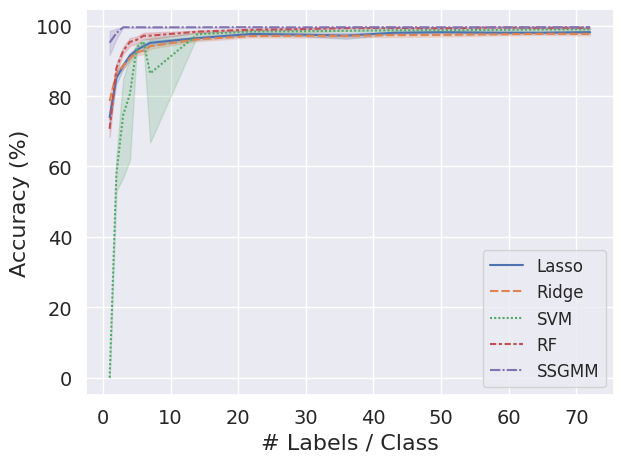

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8))
sns.lineplot(df_all, x='LabelsPerClass', y='Accuracy', hue='Model', hue_order=['Lasso', 'Ridge', 'SVM', 'RF', 'SSGMM'], style="Model", markers=False, dashes=True, ax=ax)
ax.set_xlabel('# Labels / Class', fontsize=16)
ax.set_ylabel('Accuracy (%)', fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=12)
fig.tight_layout()

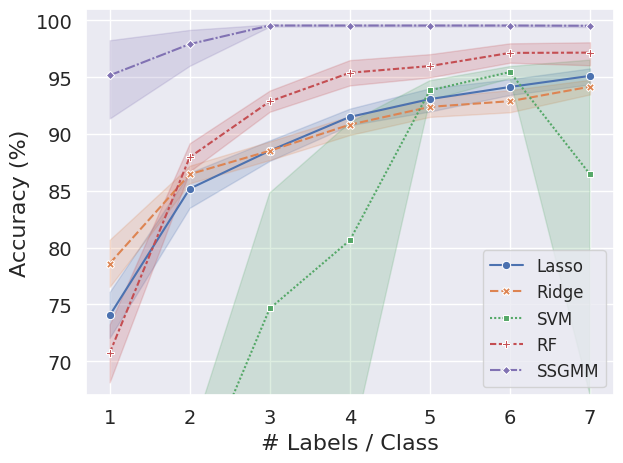

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8))
sns.lineplot(df_all[df_all['LabelsPerClass'] <= 10], x='LabelsPerClass', y='Accuracy', hue='Model', hue_order=['Lasso', 'Ridge', 'SVM', 'RF', 'SSGMM'], style="Model", markers=True, dashes=True, ax=ax)
ax.set_ylim(ymin=0.67, ymax=1.01)
ax.set_xlabel('# Labels / Class', fontsize=16)
ax.set_ylabel('Accuracy (%)', fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=12)
fig.tight_layout()

## Feature Importance

In [19]:
df_all[(df_all['Model'] == 'RF') & (df_all['Label Fraction'] == 1.0)][['F1', 'Seed']]

,F1,Seed
3,0.995452,1
10,0.995452,7
17,0.990896,8
24,0.995443,9
31,0.988635,4
38,0.995452,6
45,0.995452,2
52,0.995452,3
59,0.995443,0
66,0.995452,5


In [20]:
with open(os.path.join(MODEL_DIR, 'models_seed_1_full.pkl'), 'rb') as f:
    models = pickle.load(f)
rf = models['RF']

In [21]:
DATA_FILE = os.path.join(DATA_DIR, 'crop_recommendation.csv')
df = pd.read_csv(DATA_FILE)

In [22]:
# Get feature importances
importances = rf.feature_importances_
feature_names = df.columns.values[:-1]
# Display feature importance as a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df['Feature'] = importance_df['Feature'].map(lambda x: 'pH' if x == 'ph' else x.capitalize())
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
6,Rainfall,0.228568
4,Humidity,0.220109
2,K,0.168006
1,P,0.149541
0,N,0.103665
3,Temperature,0.077893
5,pH,0.052218


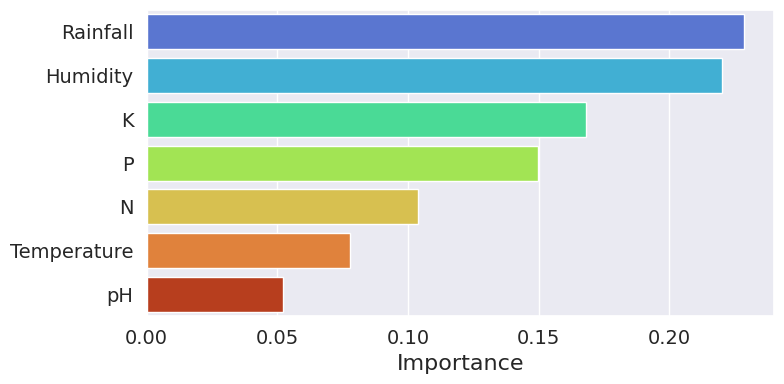

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.barplot(importance_df, y='Feature', x='Importance', orient='h', hue='Feature', palette='turbo')
ax.yaxis.label.set_visible(False)
ax.set_xlabel(ax.get_xlabel(), fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()